# 4. RESULTS

##### * And vizualisation*

- **For each *TOPIC*, computes the overall value for each *EMOTION* by:**

    1. ** Makes one large matrix with the values for the *EMOTIONS* associated with each sentence**
    2. ** Makes one large matrix with the values for the *TOPICS* associated with each sentence**
    3. ** Computes the dot product of the each of the columns of the *TOPICS* matrix and the entire *EMOTIONS* matrix.**
    
    
- **Plots the values for the overall emotions associated with each topic in 6 different bar plots which, together with the Average Ratings bar plot from the Preprocessing Notebook, are used in the analysis of the results of this research and in answering the targeted research questions. **

In [130]:
%matplotlib inline

from langdetect import detect

import nltk

from nltk.corpus import wordnet as wn

from gensim import corpora, models

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import csv
import json
import sys
import numpy as np
from __future__ import division 
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.rcParams['figure.figsize'] = (9, 6)

In [131]:
# Files and inputs
CATEGORIES_FILE = 'categories.json'
TOPICS_FILE = 'topics.json'
EMOTIONS_FILE = 'analysis_output_sentences.json'

In [132]:
emotions_list = []
# Read normalized text
with open(EMOTIONS_FILE) as f:
    text = json.load(f)
    emotions_list.append(text)

In [133]:
topics_list = []
# Read normalized text
with open(TOPICS_FILE) as f:
    text = json.load(f)
    topics_list.append(text)

In [134]:
emotions = emotions_list[0]

In [135]:
topics = topics_list[0]

In [136]:
topics

[[0, 0, 0, 1, 0, 2],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0,

In [137]:
topics = np.array(topics)

In [138]:
cleanliness_scores = np.dot(topics[:,0], emotions)
service_scores = np.dot(topics[:,1], emotions)
value_scores = np.dot(topics[:,2], emotions)
location_scores = np.dot(topics[:,3], emotions)
sleep_quality_scores = np.dot(topics[:,4], emotions)
room_scores = np.dot(topics[:,5], emotions)

In [139]:
cleanliness_scores = cleanliness_scores/max(cleanliness_scores)
service_scores = service_scores/max(service_scores)
value_scores = value_scores/max(value_scores)
location_scores = location_scores/max(location_scores)
sleep_quality_scores = sleep_quality_scores/max(sleep_quality_scores)
room_scores = room_scores/max(room_scores)

In [140]:
# Read categories
with open(CATEGORIES_FILE) as f:
    categories = json.load(f)
    emotions_names = categories['emotion']

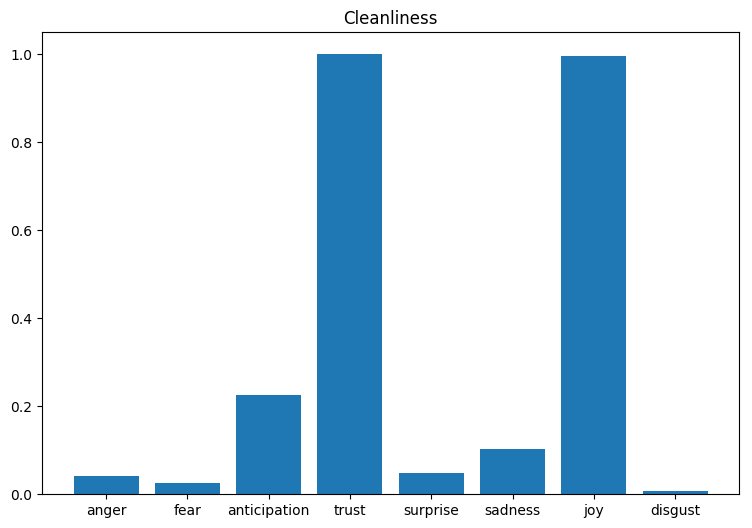

In [141]:
plt.bar(range(len(emotions_names)), cleanliness_scores, align='center')
plt.title("Cleanliness")
plt.xticks(np.arange(8), emotions_names)
plt.show()

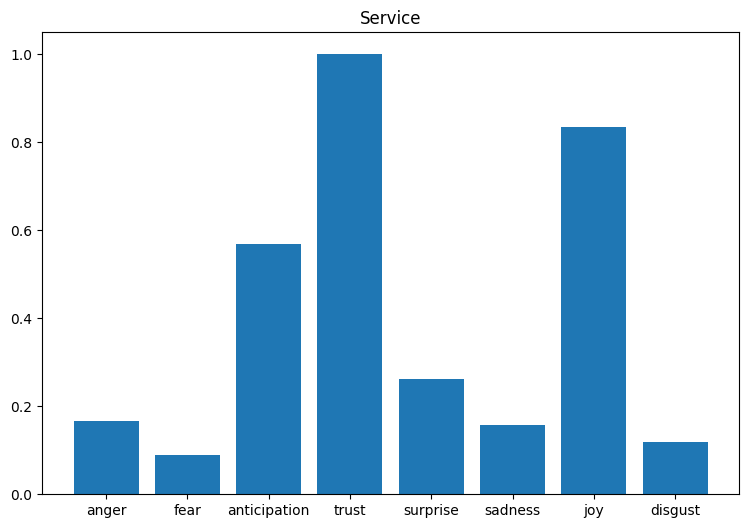

In [142]:
plt.bar(range(len(emotions_names)), service_scores, align='center')
plt.title("Service")
plt.xticks(np.arange(8), emotions_names)
plt.show()

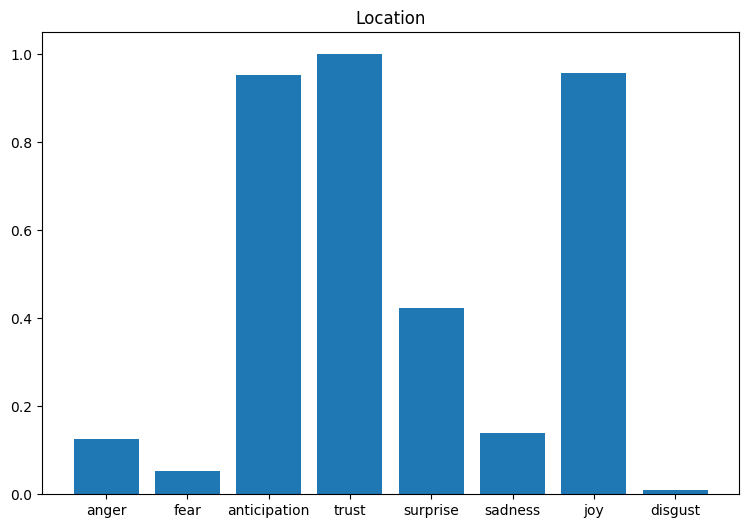

In [143]:
plt.bar(range(len(emotions_names)), location_scores, align='center')
plt.title("Location")
plt.xticks(np.arange(8), emotions_names)
plt.show()

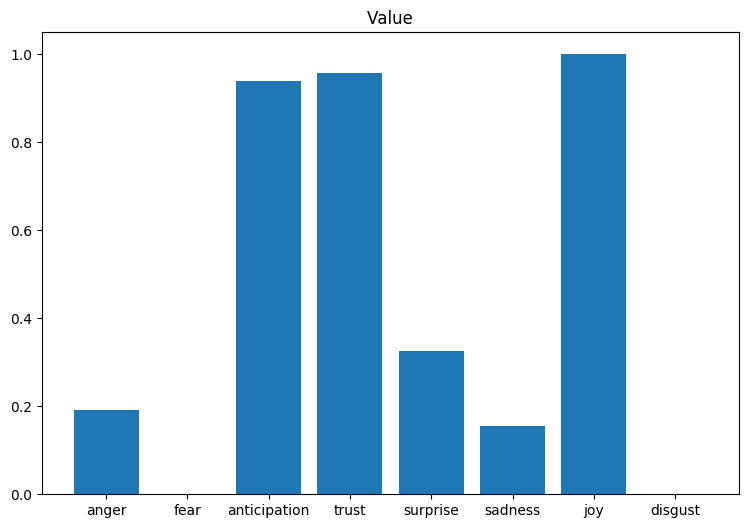

In [144]:
plt.bar(range(len(emotions_names)), value_scores, align='center')
plt.title("Value")
plt.xticks(np.arange(8), emotions_names)
plt.show()

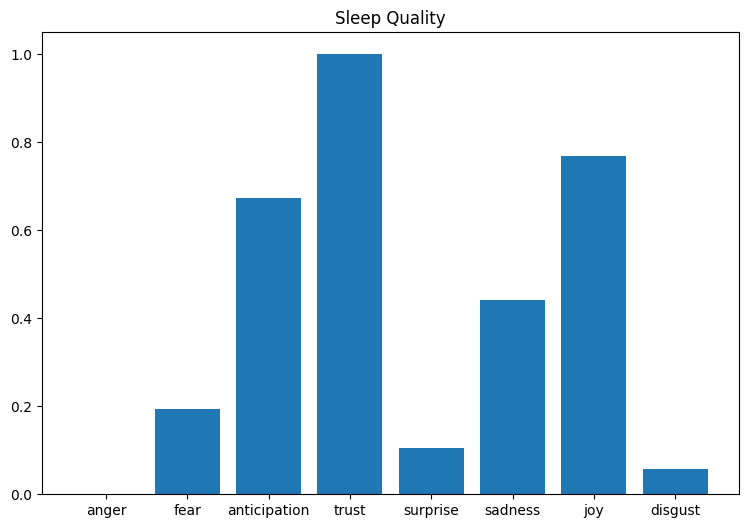

In [145]:
plt.bar(range(len(emotions_names)), sleep_quality_scores, align='center')
plt.title("Sleep Quality")
plt.xticks(np.arange(8), emotions_names)
plt.show()

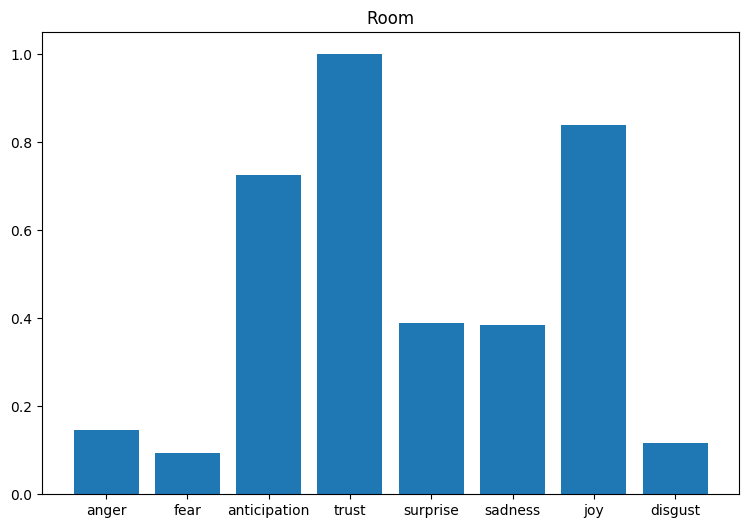

In [146]:
plt.bar(range(len(emotions_names)), room_scores, align='center')
plt.title("Room")
plt.xticks(np.arange(8), emotions_names)
plt.show()